
#2,set data
rs0, zDat/cn/

#3,init.qx
tq_init name...
zDat/inx/
xstk_name.csv
zDat/inx/xstk_name.csv
tq_init pools...

clst: ['000001', '002046', '600663', '000792', '600029', '000800']
1 / 6 zDat/cn/day/000001.csv
2 / 6 zDat/cn/day/002046.csv
3 / 6 zDat/cn/day/600663.csv
4 / 6 zDat/cn/day/000792.csv
5 / 6 zDat/cn/day/600029.csv
6 / 6 zDat/cn/day/000800.csv

clst: ['000001']
1 / 1 zDat/cn/xday/000001.csv
tq_init work data...

obj:qx

 
aiMKeys         = []
aiModel         = {}
btTim0          = 2017-01-01T00:00:00+00:00
btTim0Str       = 2017-01-03
btTim9          = 2017-09-30T00:00:00+00:00
btTim9Str       = 2017-09-29
btTimLst        = ......
btTimNum        = 184
inxCodeLst      = ['000001']
inxNamTbl       = ......
inxPools        = ......
preFun          = None
preVars         = []
priceDateFlag   = True
priceSgn        = avg
prjNam          = TM
rdat0           = zDat/cn/
rtmp            = tmp/
staFun          = None
staVars         = []
stkCodeLst      = ......
stkNamTbl       


#7.3,plot stk-->tmp/tmp_.html

#8.1,stk.merge

#8.2,dat,cut

 
#df2
            x000001  000001  002046  600663  000792  600029  000800
date                                                               
2017-01-03    8.860     nan     nan     nan     nan     nan     nan
2017-01-04    8.880     nan     nan     nan     nan     nan     nan
2017-01-05    8.890     nan     nan     nan     nan     nan     nan
2017-01-06    8.870     nan     nan     nan     nan     nan     nan
2017-01-09    8.860     nan     nan     nan     nan     nan     nan
2017-01-10    8.870     nan     nan     nan     nan     nan     nan
2017-01-11    8.870     nan     nan     nan     nan     nan     nan
2017-01-12    8.870     nan     nan     nan     nan     nan     nan
2017-01-13    8.880     nan     nan     nan     nan     nan     nan
2017-01-16    8.850     nan     nan     nan     nan     nan     nan
            x000001  000001  002046  600663  000792  600029  000800
date                                           

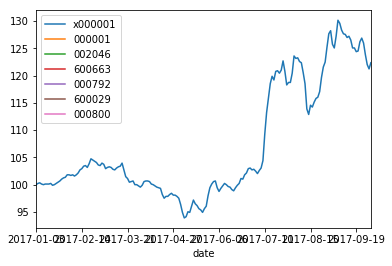

In [5]:
# -*- coding: utf-8 -*-
'''
TopQuant-简称TQ极宽智能量化回溯分析系统，培训课件-配套教学python课件程序

Top极宽量化(原zw量化)，Python量化第一品牌 
by Top极宽·量化开源团队 2017.10.1 首发

网站： www.TopQuant.vip      www.ziwang.com
QQ群: Top极宽量化1群，124134140
      Top极宽量化2群，650924099
      Top极宽量化3群，450853713
  
'''

import os,arrow,ffn,pickle
import numpy as np
import pandas as pd
import tushare as ts

import plotly as py
import plotly.figure_factory  as pyff

#2
import keras
from keras import initializers,models,layers
from keras.models import Sequential,load_model
from keras.layers import Flatten,Dense, Input, Dropout, Embedding,SimpleRNN,Bidirectional,LSTM,Conv1D, GlobalMaxPooling1D,Activation,MaxPooling1D,GlobalAveragePooling1D
from keras.optimizers import RMSprop
from keras.utils import plot_model


#  TopQuant
import zsys 
import zpd_talib as zta
import ztools as zt
import ztools_tq as ztq
import ztools_bt as zbt
import ztools_sta as zsta
import ztools_str as zstr
import ztools_data as zdat
import ztools_datadown as zddown
import ztools_draw as zdr

%matplotlib inline

#-------------------    

#1 预处理
pd.set_option('display.width', 450)    
pd.set_option('display.float_format', zt.xfloat3)    
pyplt=py.offline.plot 
#---------------

#2 set data
print('\n#2,set data')
 # 大盘参数
inxLst=['000001']
# 股票池参数代码
codLst=['000001','002046','600663','000792','600029','000800']
# 回溯测试的起始截止时间
tim0Str,tim9Str='2017-01-01','2017-09-30'

rs0=zsys.rdatCN0        #'/zDat/cn/'

# 回溯项目名称  回溯价格参数字段名称，均值模式与close收盘价不同
prjNam,ksgn='TM','avg'
# 回溯程序参数保存文件名的前缀
ftg0='tmp/'+prjNam
print('rs0,',rs0)


#3 init.qx
print('\n#3,init.qx')
qx=zbt.bt_init(rs0,codLst,inxLst,tim0Str,tim9Str,ksgn,prjNam)
ztq.tq_prVar(qx)

#
#4 set.bT.var
# 设置量化策略函数
print('\n#4,set.BT.var')
# 数据预处理
qx.preFun=zsta.lstm010_dpre
# 与处理函数参数变量列表
qx.preVars=[10]
# 量化分析策略函数
qx.staFun=zsta.lstm010
#  策略函数的参数变量列表
qx.staVars=[1.0,1.2]
#
#5 set.bT.var
# 数据预处理
print('\n#5,call::qx.preFun')
ztq.tq_pools_call(qx,qx.preFun)
# 即通过股票池主调用函数

#6.1 load_model
print('\n#6.1,load_model')
mx=load_model('data/bt_lstm010mx2k.dat') ###
qx.aiModel['lstm010']=mx
#
mx.summary()
plot_model(mx, to_file='tmp/lstm010bt.png')

#6.2 var&model.wr  保存qx参数和量化分析中使用的神经网络模型
print('\n#6.2 var&model.wr')
fmx0='tmp/TM_';ztq.ai_varWr(qx,fmx0)
qx=ztq.ai_varRd(fmx0);


#------------
#7 chk.dat
# 循环检查相关的股票池交易数据
print('\n7.1 tq_pools_chk')
ztq.tq_pools_call(qx,ztq.tq_pools_chk)

print('\n#7.2,plot inx -->tmp/tmp_.html')
xinx,df=qx.wrkInxCod,qx.wrkInxDat
hdr,fss='k线图-inx '+xinx,'tmp/tmp_'+xinx+'.html'
df2=df.tail(100)
zdr.drDF_cdl(df2,ftg=fss,m_title=hdr)

print('\n#7.3,plot stk-->tmp/tmp_.html')
xcod,df=qx.wrkStkCod,qx.wrkStkDat
hdr,fss='k线图-stk '+xcod,'tmp/tmp_'+xcod+'.html'
df2=df.tail(100)
zdr.drDF_cdl(df2,ftg=fss,m_title=hdr)

#8

# 数据归一化处理
print('\n#8.1,stk.merge')
df9=ztq.tq_usrPoolsMerge(qx)

print('\n#8.2,dat,cut')
df2=zdat.df_kcut8tim(df9,'',tim0Str,tim9Str)
zt.prDF('\n#df2',df2)
        
print('\n#8.3,rebase')        
dfx=df2.rebase()
zt.prDF('\n#dfx',dfx)
        
print('\n#8.4,plot,rebase')
dfx.plot()
